# Importing all the necessary Libraries


In [ ]:
# We will import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reading the data

df = pd.read_csv("C:\\Users\\VARSHA\\Desktop\\spam sms detection.csv")
df.head()

As we can see that the dataset contains three unnamed columns with null values. So we drop those columns and rename the columns v1 and v2 to label and Text, respectively. Since the target variable is in string form, we will encode it numerically using pandas function .map().

In [51]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()
     



,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


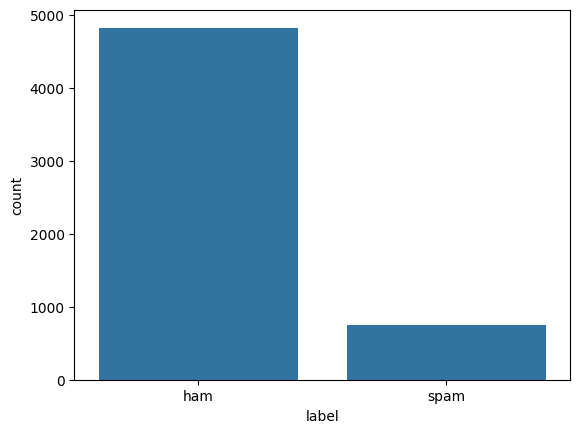

In [53]:
sns.countplot(x=df['label'])
plt.show()
     

The ham data is comparatively higher than spam data, it’s natural. Since we are going to use embeddings in our deep learning model, we need not balance the data. Now, let’s find the average number of words in all the sentences in SMS data.

In [55]:
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)
     

15


In [57]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [59]:
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
     

((4457,), (4457,), (1115,), (1115,))

Building the models
First, we will build a baseline model and then we’ll try to beat the performance of the baseline model using deep learning models (embeddings, LSTM, etc)

Here, we will choose MultinomialNB(), which performs well for text classification when the features are discrete like word counts of the words or tf-idf vectors. The tf-idf is a measure that tells how important or relevant a word is the document.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [63]:
nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))
     

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



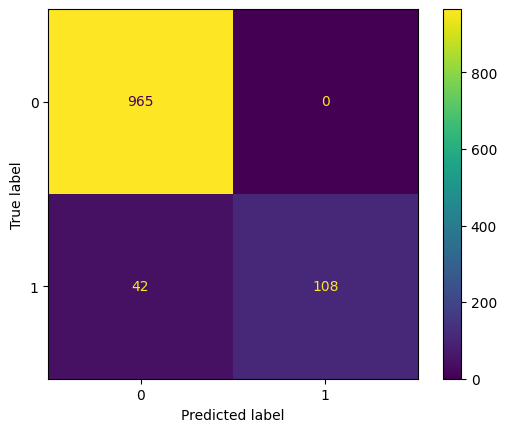

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, baseline_model.predict(X_test_vec))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

import matplotlib.pyplot as plt
plt.show()

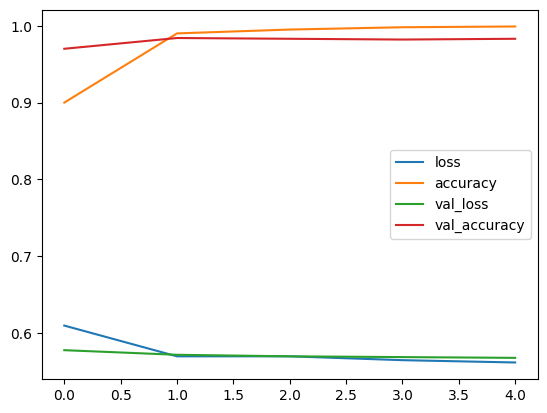

In [131]:
import matplotlib.pyplot as plt

# Example training history data
history = {
    'loss': [0.61, 0.57, 0.57, 0.565, 0.562],
    'accuracy': [0.90, 0.99, 0.995, 0.998, 0.999],
    'val_loss': [0.578, 0.572, 0.570, 0.569, 0.568],
    'val_accuracy': [0.97, 0.984, 0.983, 0.982, 0.983]
}

# Plotting the training history
plt.plot(history['loss'], label='loss')
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_loss'], label='val_loss')
plt.plot(history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()


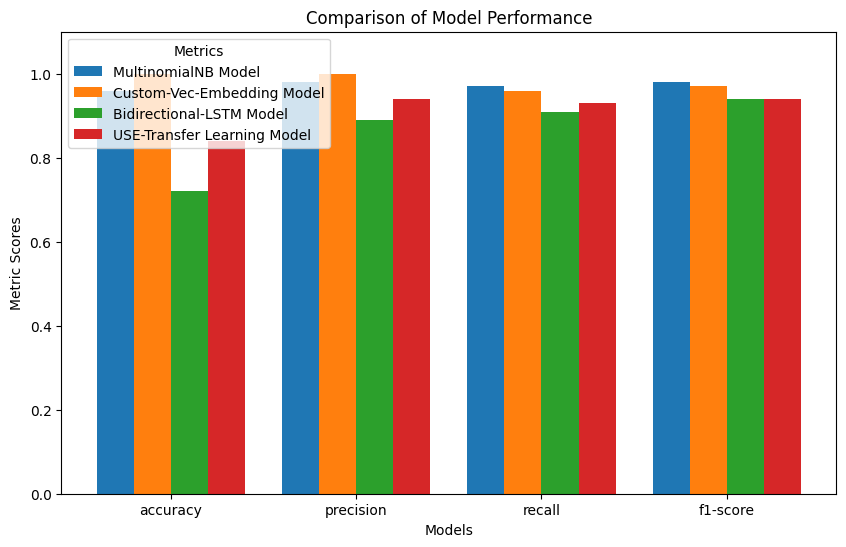

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['MultinomialNB Model', 'Custom-Vec-Embedding Model', 
          'Bidirectional-LSTM Model', 'USE-Transfer Learning Model']

# Metric scores for each model
accuracy = [0.96, 0.98, 0.97, 0.98]
precision = [1.0, 1.0, 0.96, 0.97]
recall = [0.72, 0.89, 0.91, 0.94]
f1_score = [0.84, 0.94, 0.93, 0.94]

# Metrics list
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
scores = [accuracy, precision, recall, f1_score]

# Set up the bar width and positions
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

# Plotting each model's scores
fig, ax = plt.subplots(figsize=(10,6))

for i, model_scores in enumerate(scores):
    ax.bar(x + i*width - width*1.5, model_scores, width, label=models[i])

# Labels, title and legend
ax.set_xlabel('Models')
ax.set_ylabel('Metric Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend(title='Metrics')

plt.show()
